In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

In [9]:
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [15]:
raw_data = pd.read_csv("forest fire.csv")
forest_fire = pd.read_csv('forestfires.csv')
raw_data['size_category'] = forest_fire.size_category
raw_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3           small  
4           small  
..            ...  
512         large  
513         large  
514         large  
515         small  
516         small  

[517 rows x 14 columns]

In [16]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(517, 14)


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category  
0         small  
1         small  
2         small  
3         small  
4         small

In [17]:
raw_data.describe().T

count        mean         std   min    25%     50%     75%      max
X     517.0    4.669246    2.313778   1.0    3.0    4.00    7.00     9.00
Y     517.0    4.299807    1.229900   2.0    4.0    4.00    5.00     9.00
FFMC  517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC   517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC    517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI   517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp  517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH    517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind  517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain  517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area  517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    object 
 3   day            517 non-null    object 
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  area           517 non-null    float64
 13  size_category  517 non-null    object 
dtypes: float64(8), int64(3), object(3)
memory usage: 56.7+ KB


In [19]:
raw_data.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [20]:
raw_data[raw_data.duplicated()]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   

    size_category  
53          small  
100         small  
215         large  
303         small

In [21]:
raw_data[raw_data.duplicated()].shape

(4, 14)

In [22]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 11


X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [23]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 4


In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [25]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [26]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts())

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64
day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64
size_category
small    378
large    139
Name: count, dtype: int64


In [28]:
# view frequency distribution of categorical variables
for var in categorical:
    print(raw_data[var].value_counts() / float(len(raw_data)))

month
aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: count, dtype: float64
day
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: count, dtype: float64
size_category
small    0.731141
large    0.268859
Name: count, dtype: float64


In [29]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [35]:
numeric_data = raw_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

In [37]:
correlation_matrix.corr()

X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.804495 -0.411020 -0.513279 -0.509071 -0.397668 -0.383694   
Y     0.804495  1.000000 -0.405498 -0.429658 -0.470382 -0.407497 -0.328640   
FFMC -0.411020 -0.405498  1.000000  0.573956  0.564467  0.791478  0.748792   
DMC  -0.513279 -0.429658  0.573956  1.000000  0.917476  0.428998  0.695320   
DC   -0.509071 -0.470382  0.564467  0.917476  1.000000  0.396004  0.740261   
ISI  -0.397668 -0.407497  0.791478  0.428998  0.396004  1.000000  0.622787   
temp -0.383694 -0.328640  0.748792  0.695320  0.740261  0.622787  1.000000   
RH    0.156122  0.128332 -0.702522 -0.289659 -0.364301 -0.555386 -0.830379   
wind -0.022871 -0.082915 -0.310436 -0.535484 -0.584953 -0.120826 -0.537557   
rain -0.079852 -0.115999 -0.146250 -0.168768 -0.160607 -0.146396 -0.108502   
area -0.057140 -0.065574 -0.086405 -0.110861 -0.073409 -0.183057  0.044013   

            RH      wind      rain      area  
X     0.156122 -0.022871 -0.079852 -0.057140  
Y     0.128332 -0.082915 -0.115999 -0.065574  
FFMC -0.702522 -0.310436 -0.146250 -0.086405  
DMC  -0.289659 -0.535484 -0.168768 -0.110861  
DC   -0.364301 -0.584953 -0.160607 -0.073409  
ISI  -0.555386 -0.120826 -0.146396 -0.183057  
temp -0.830379 -0.537557 -0.108502  0.044013  
RH    1.000000  0.193106  0.101100 -0.216802  
wind  0.193106  1.000000  0.007992 -0.104916  
rain  0.101100  0.007992  1.000000 -0.217186  
area -0.216802 -0.104916 -0.217186  1.000000

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'X'),
  Text(1.5, 0, 'Y'),
  Text(2.5, 0, 'FFMC'),
  Text(3.5, 0, 'DMC'),
  Text(4.5, 0, 'DC'),
  Text(5.5, 0, 'ISI'),
  Text(6.5, 0, 'temp'),
  Text(7.5, 0, 'RH'),
  Text(8.5, 0, 'wind'),
  Text(9.5, 0, 'rain'),
  Text(10.5, 0, 'area')])

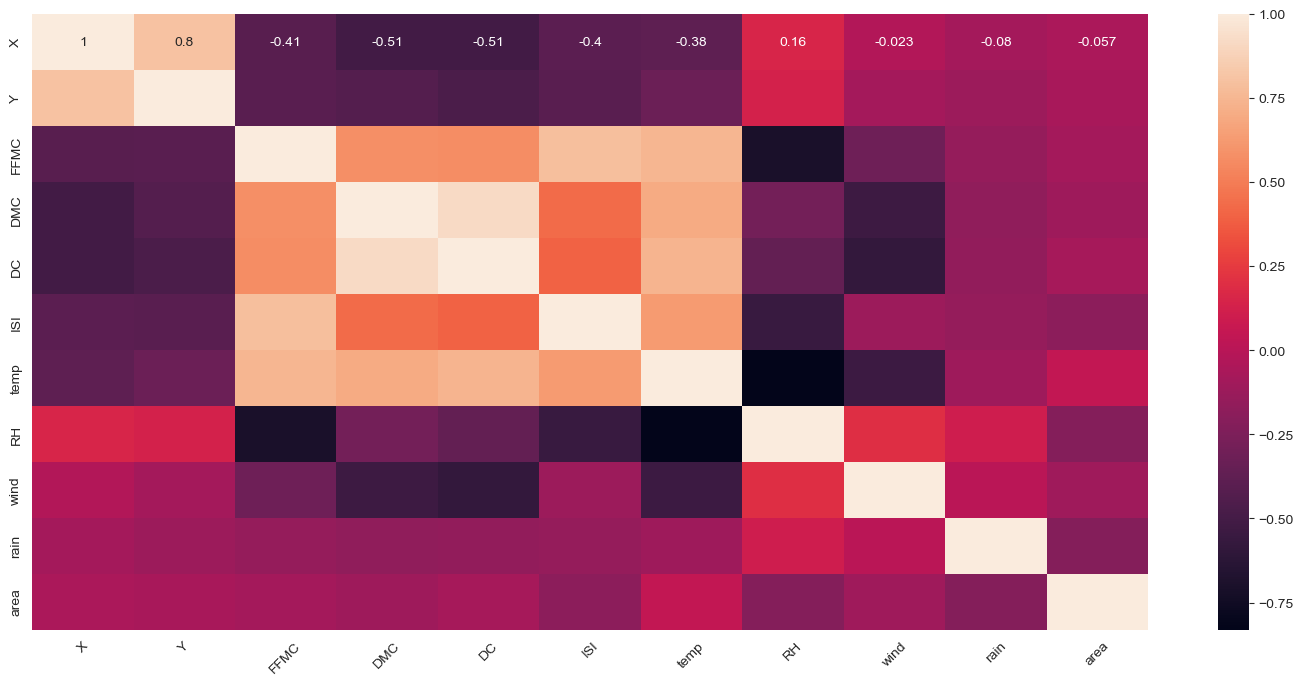

In [39]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix.corr(), annot=True);
plt.xticks(rotation=45)

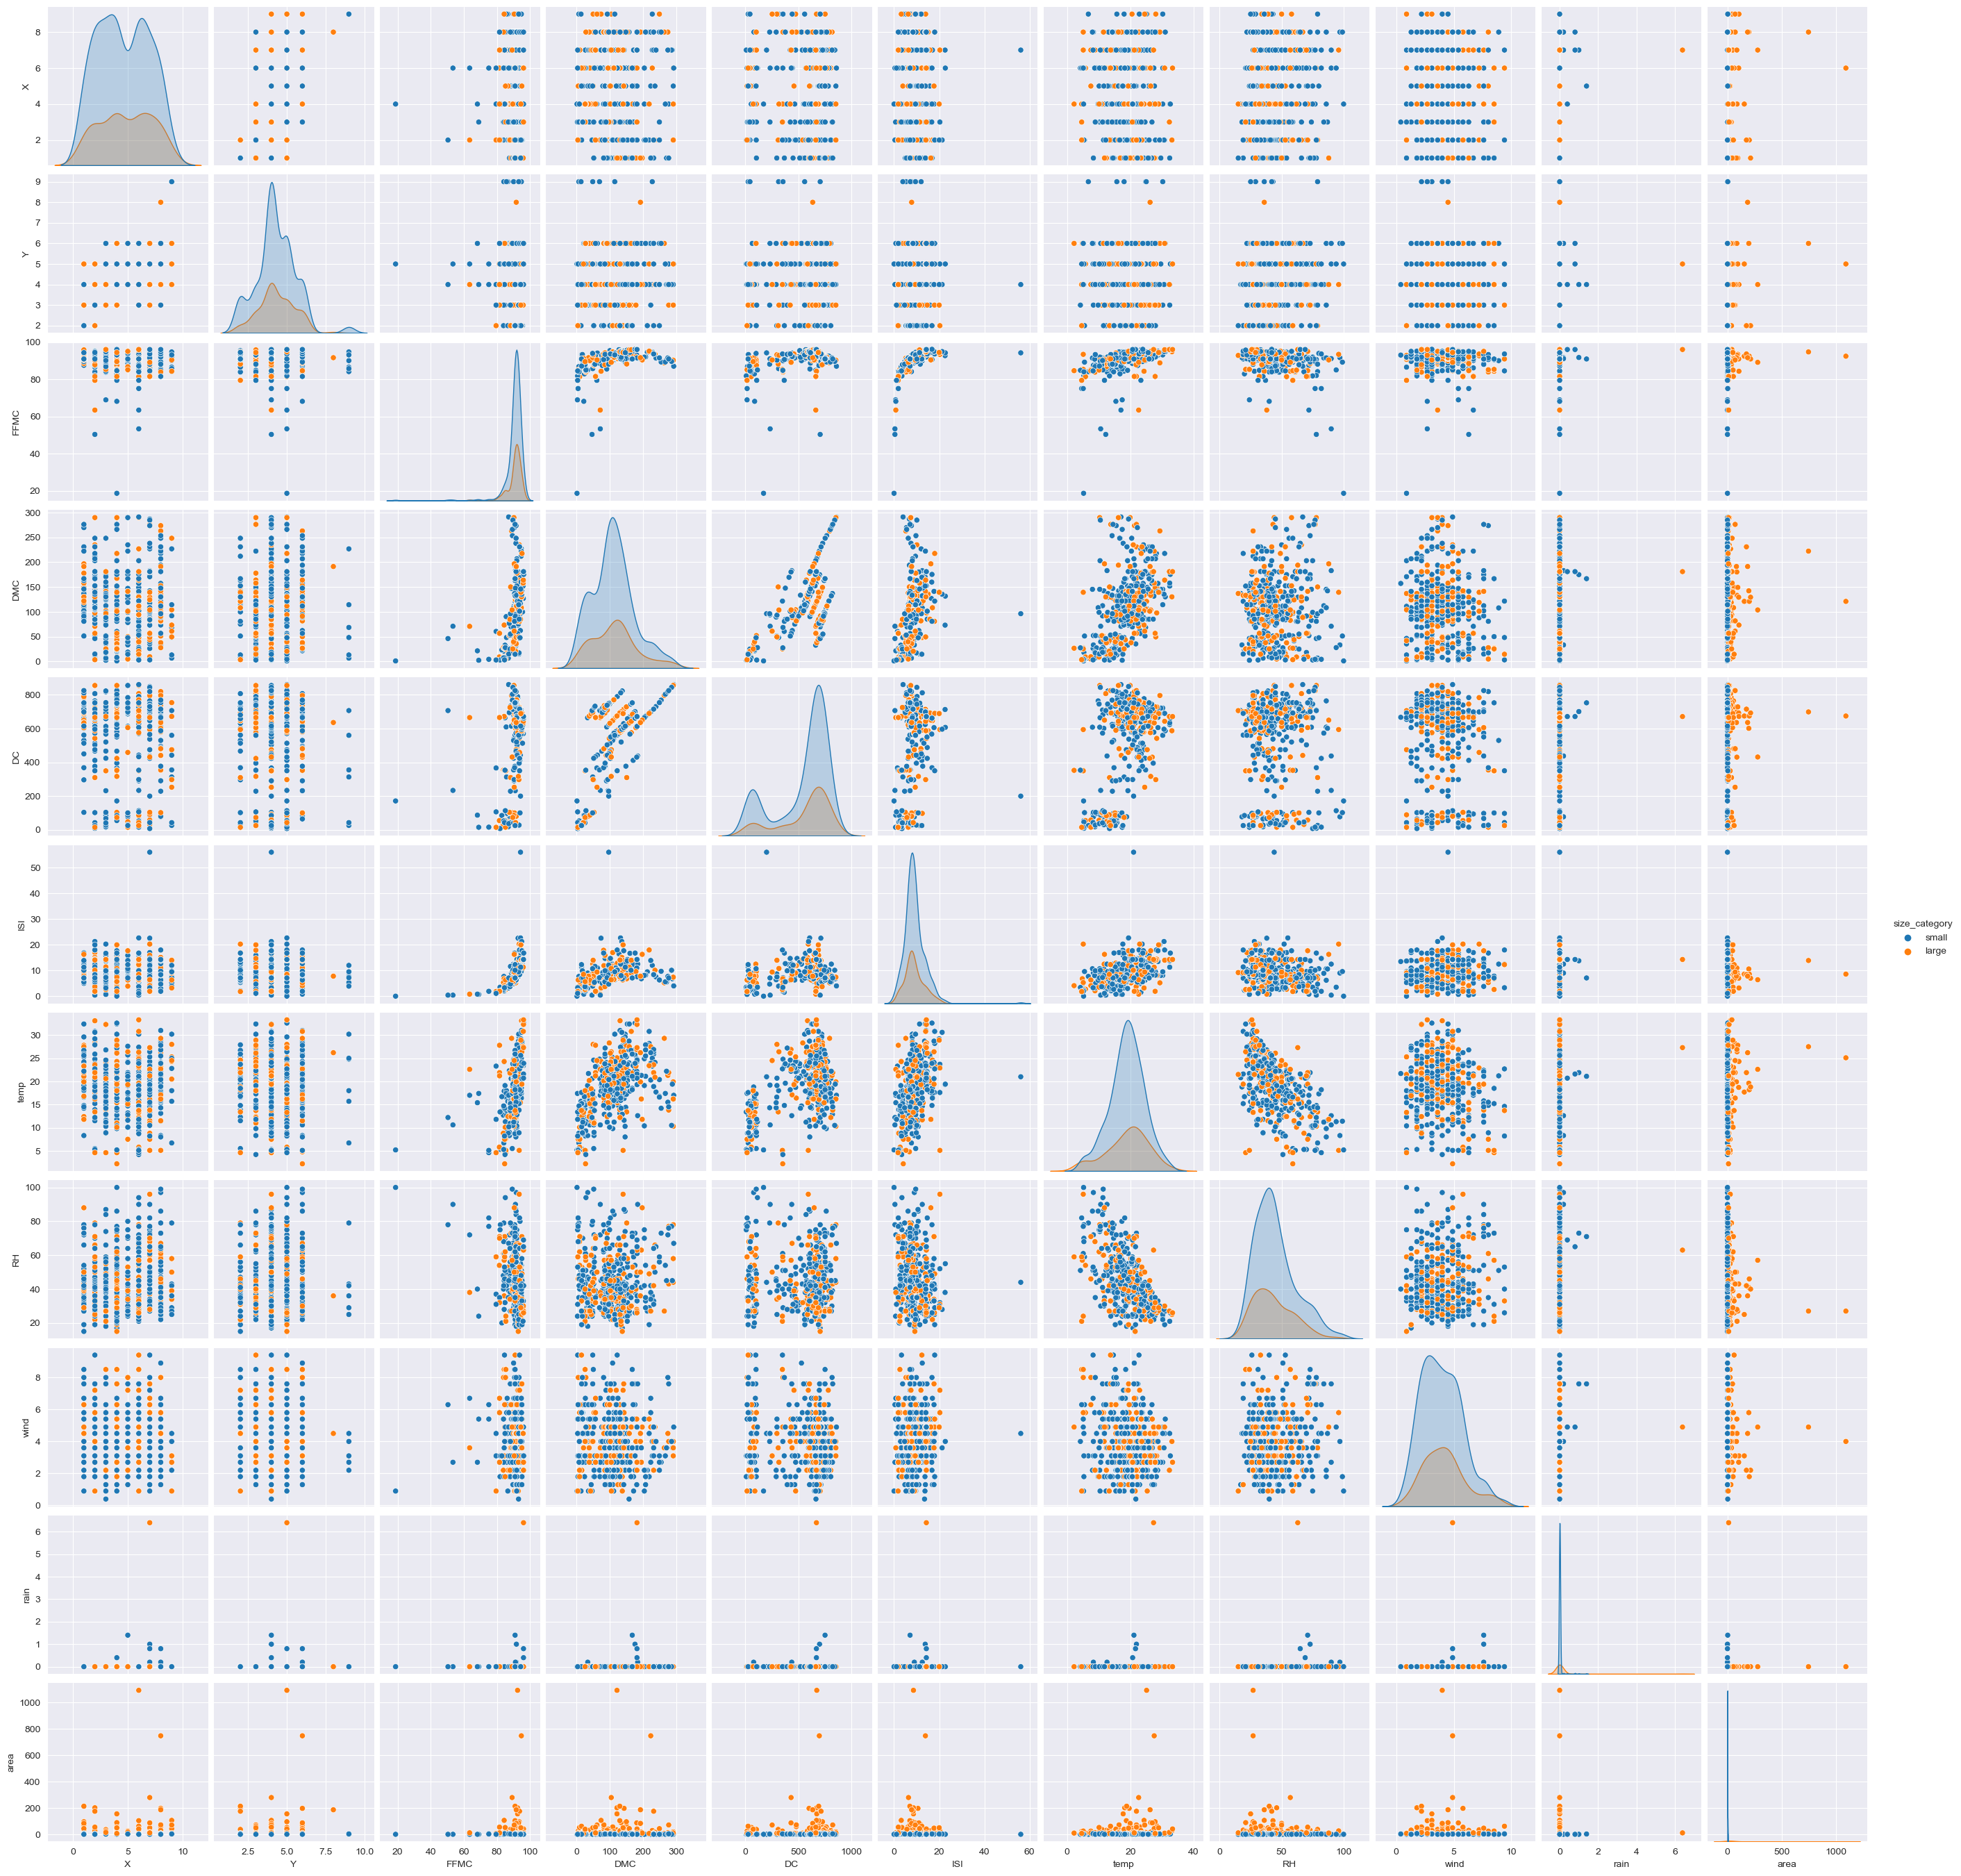

In [40]:
sns.set_style('darkgrid')
sns.pairplot(raw_data, hue='size_category')
plt.show()

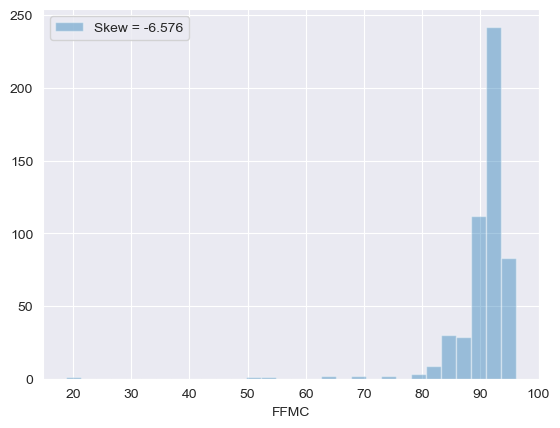

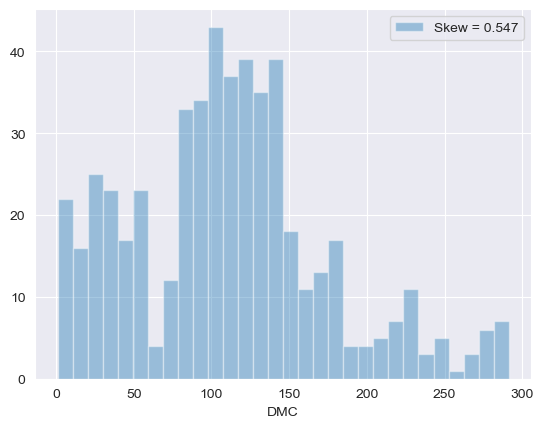

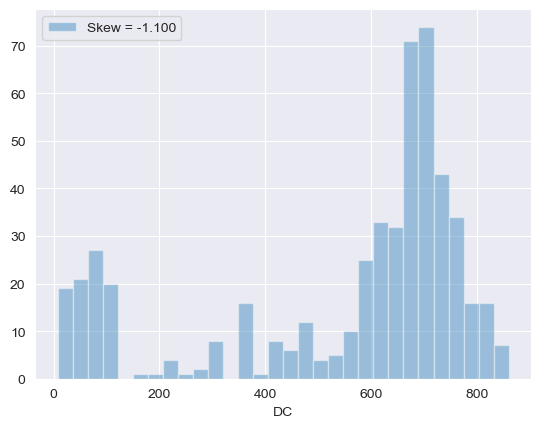

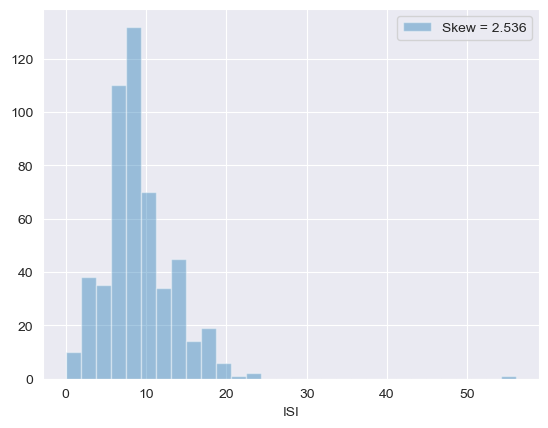

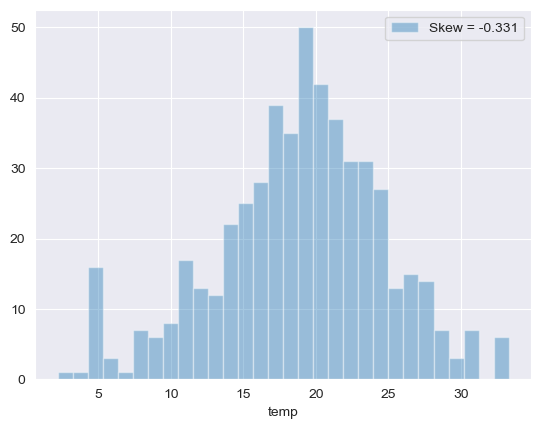

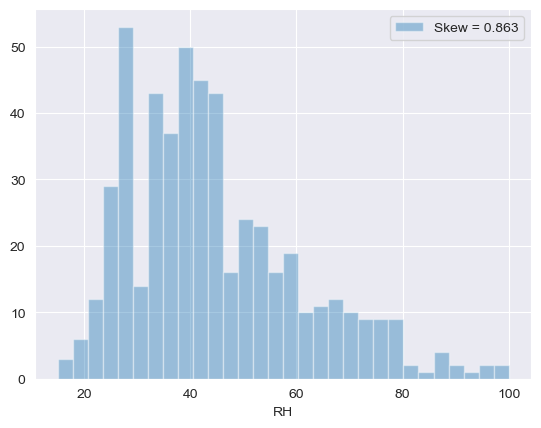

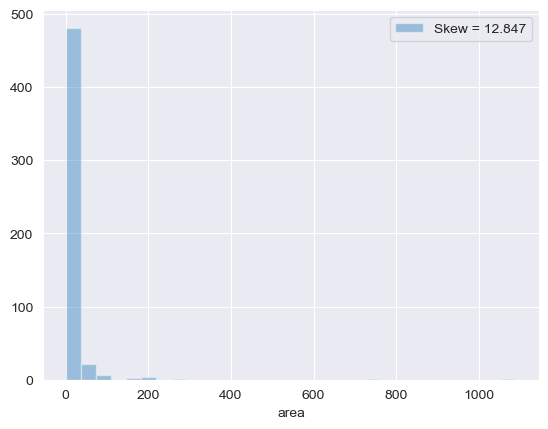

In [41]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [42]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(raw_data[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


In [44]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

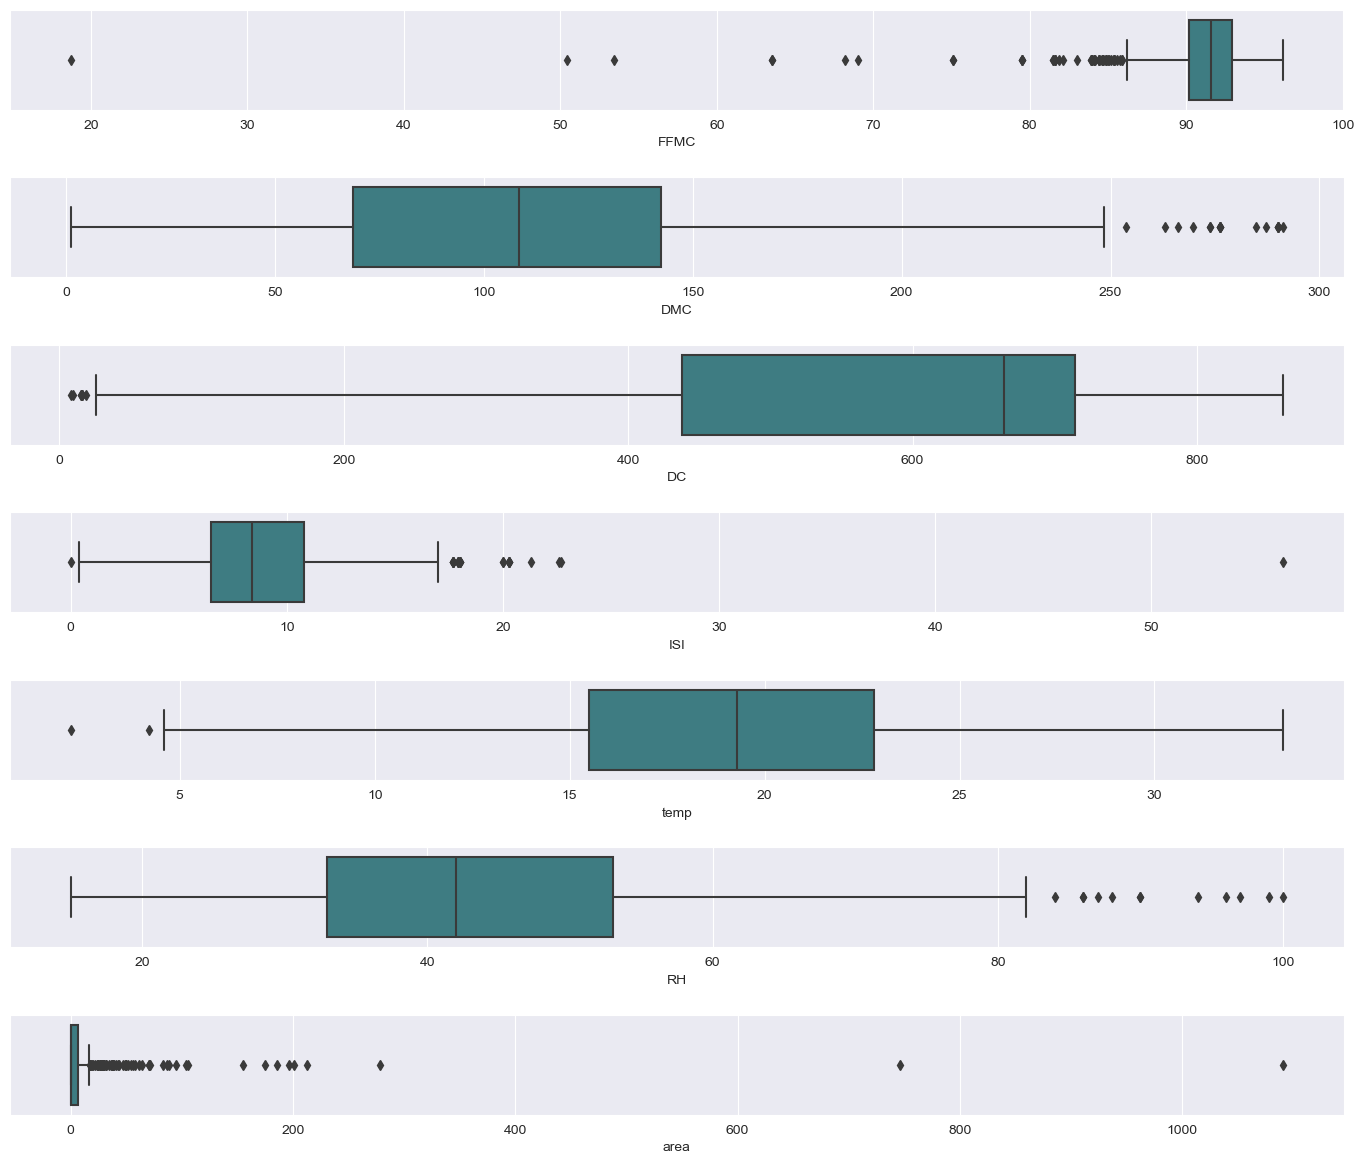

In [45]:
ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

After Log-Transformation

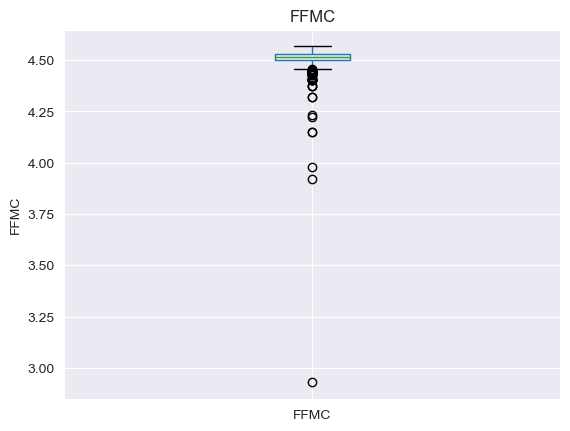

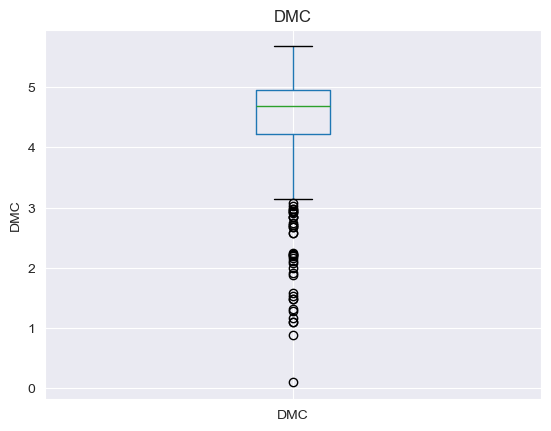

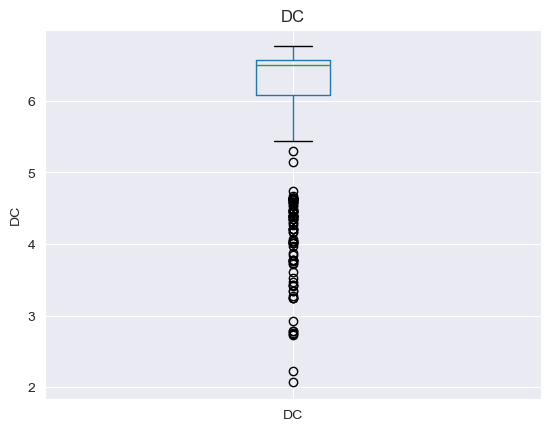

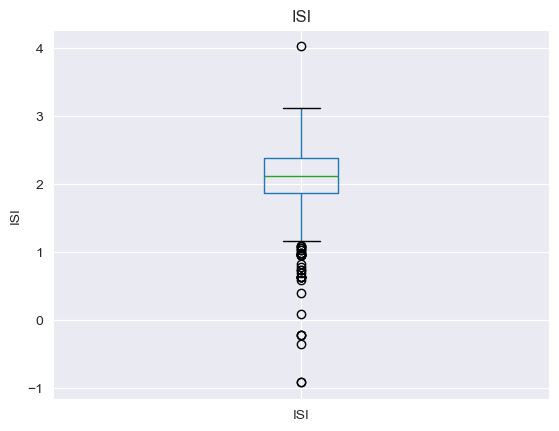

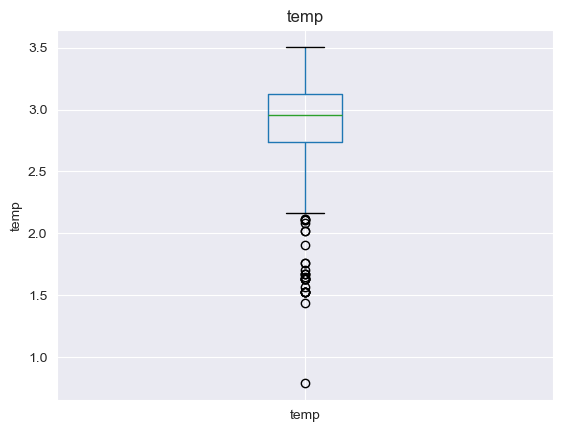

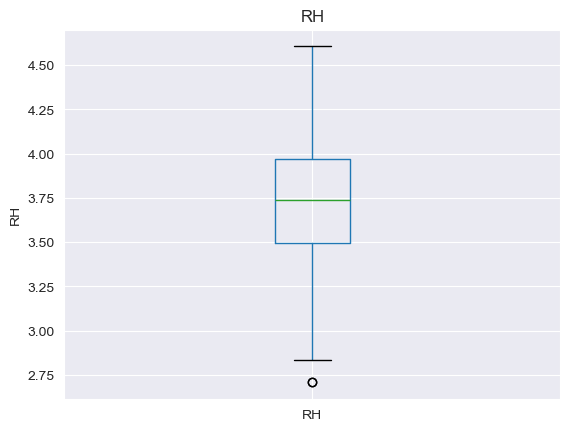

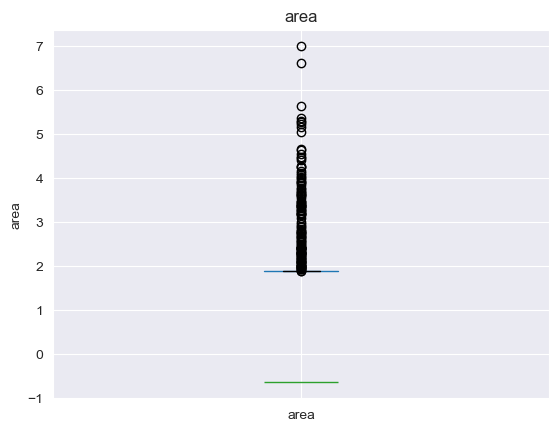

In [46]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


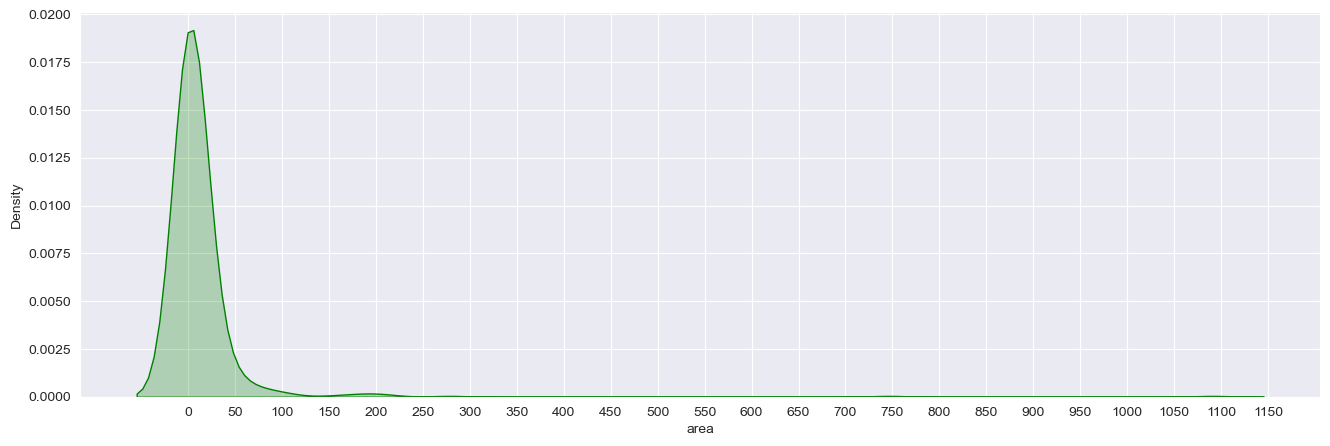

In [47]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(raw_data['area'].skew()))
print("Kurtosis: {}".format(raw_data['area'].kurtosis()))
ax = sns.kdeplot(raw_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

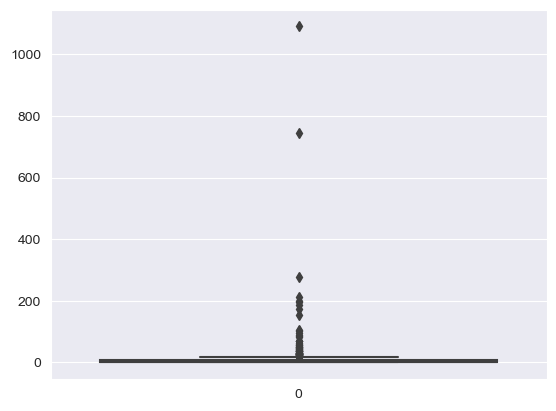

In [48]:
ax = sns.boxplot(raw_data['area'])

In [49]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


month  day size_category
0   mar  fri         small
1   oct  tue         small
2   oct  sat         small
3   mar  fri         small
4   mar  sun         small

In [50]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [51]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

Feature 'day' has 7 unique categories
day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

Feature 'size_category' has 2 unique categories
size_category
small    378
large    139
Name: count, dtype: int64



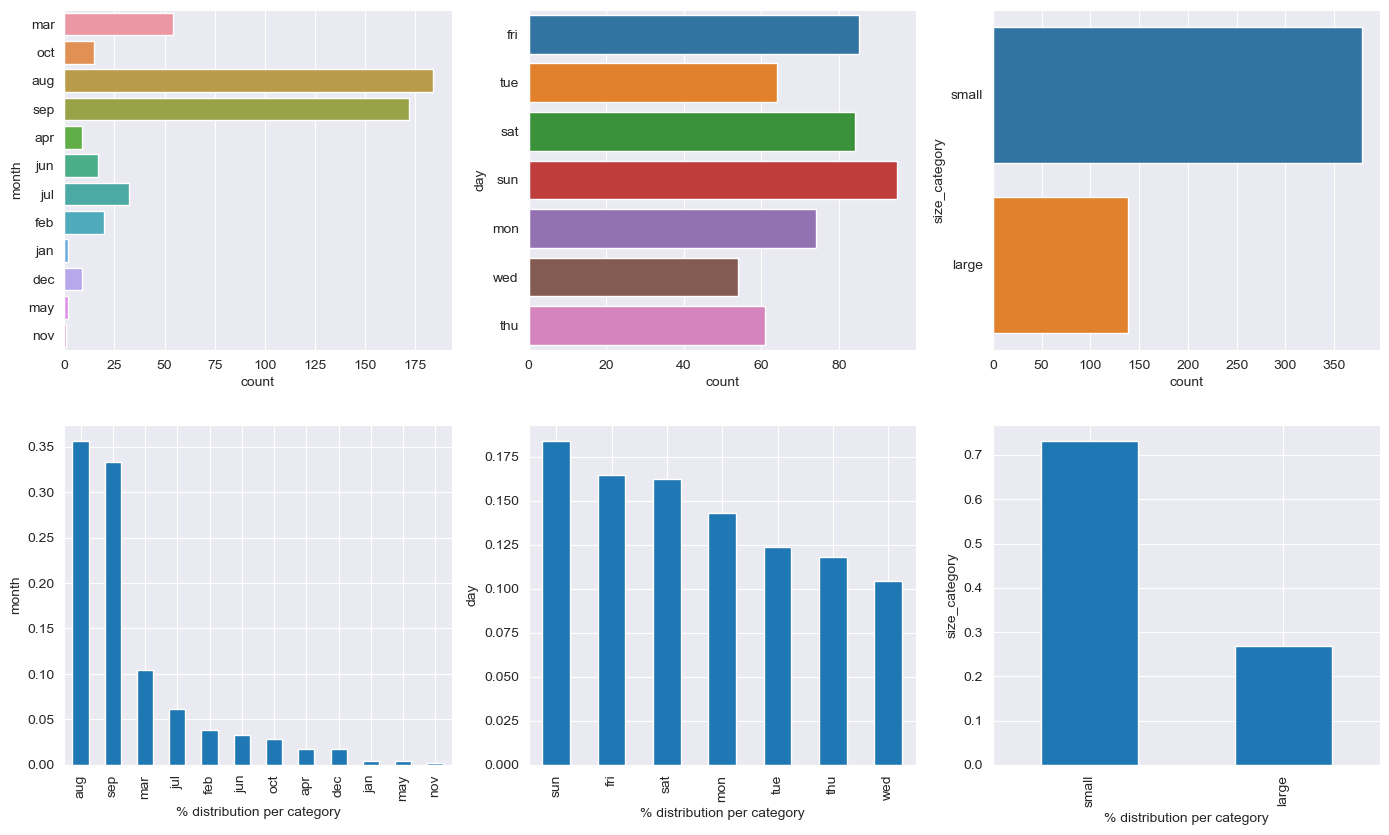

In [53]:
# analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=raw_data,y=col)
    plt.subplot(3,3,i+3)
    raw_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

Analyzing the relationship of categorical features with respect to the Target feature

Bivariate Analysis

In [54]:
print(raw_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=raw_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category damage_category  
0         small       No damage  
1         small       No damage  
2         small       No damage  
3         small       No damage  
4         small       No damage

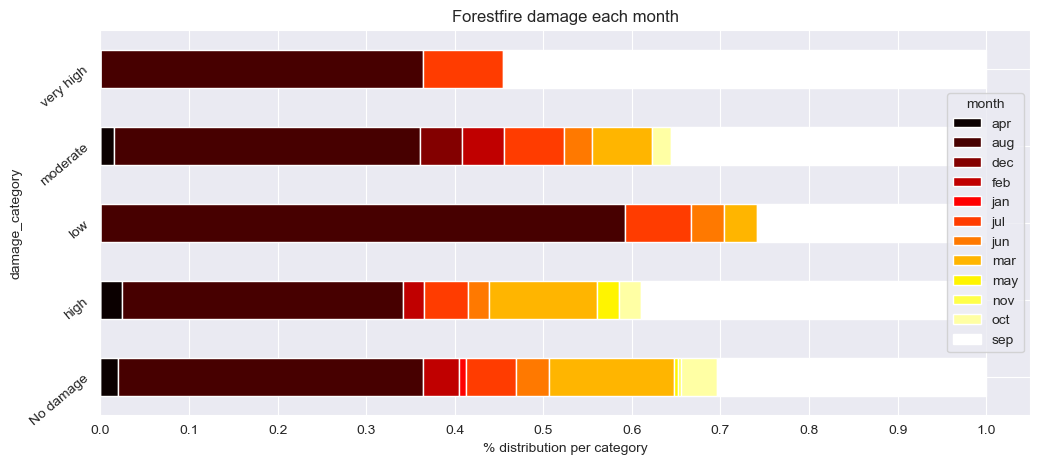

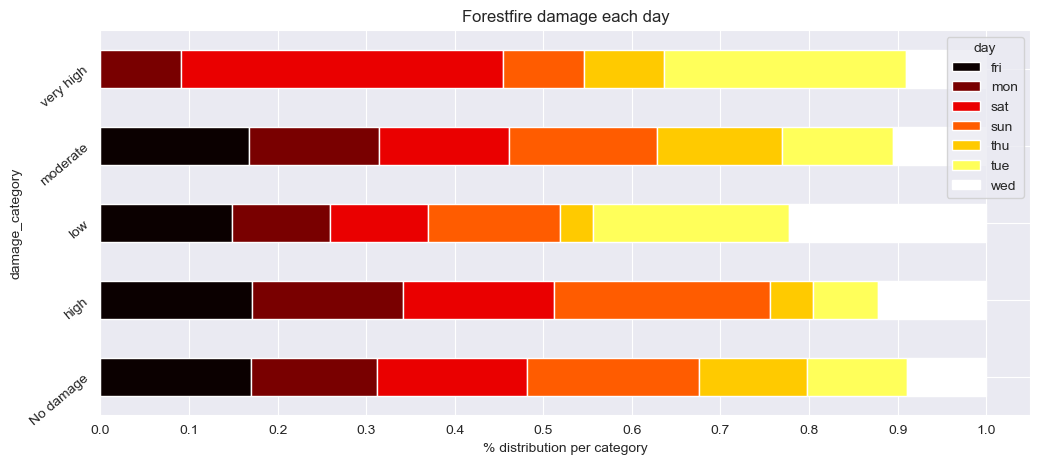

In [55]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))
        
plt.show()

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

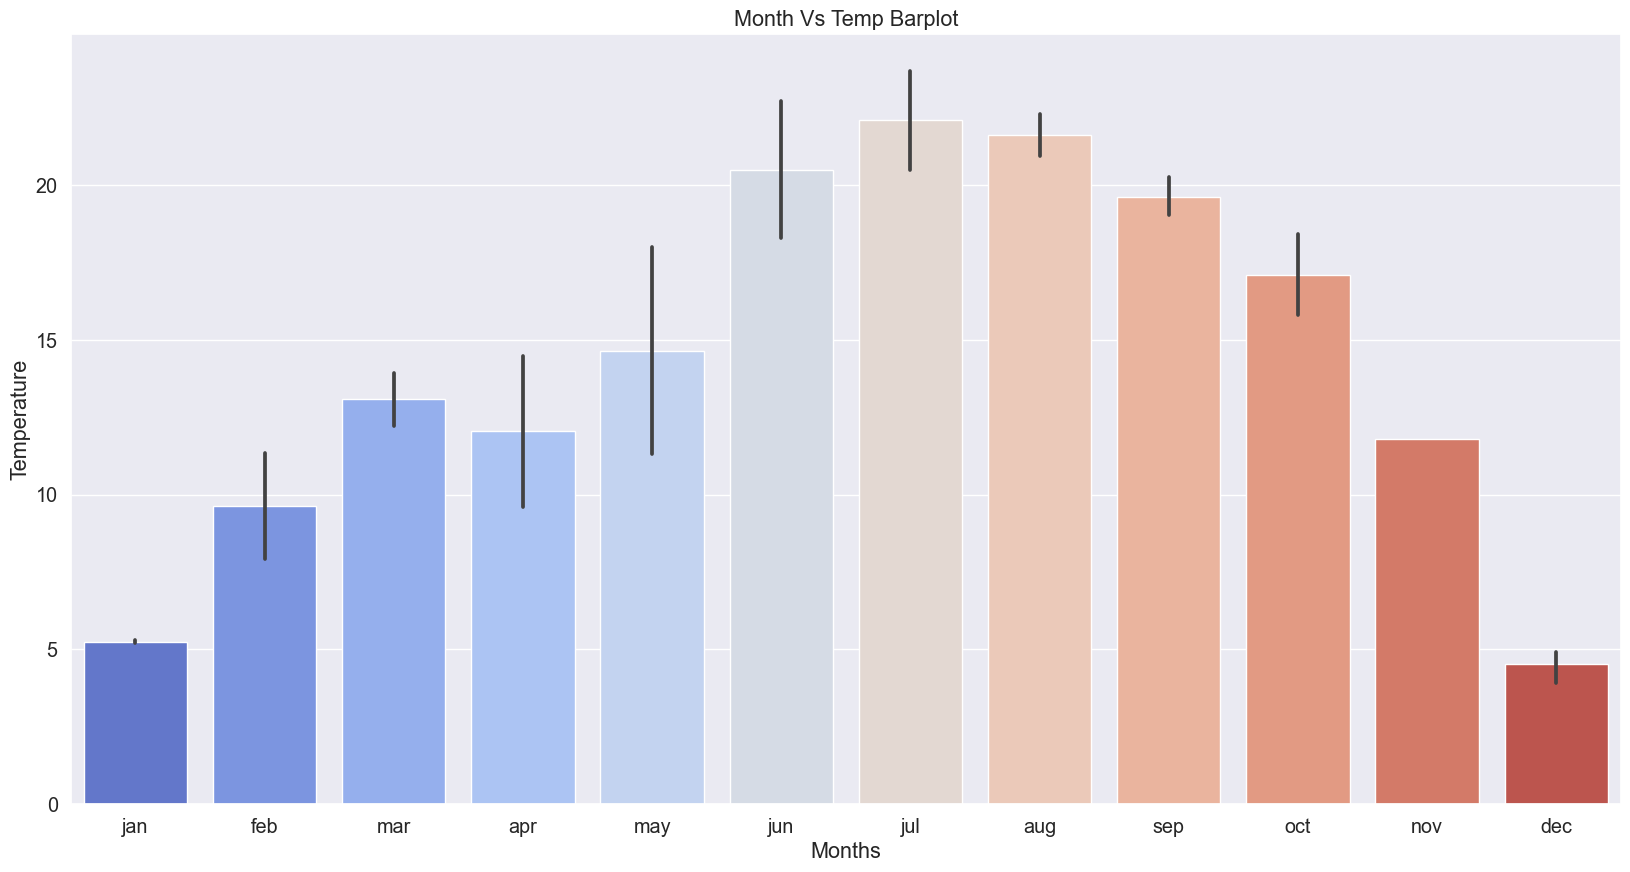

In [56]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = raw_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

<Axes: xlabel='X', ylabel='Y'>

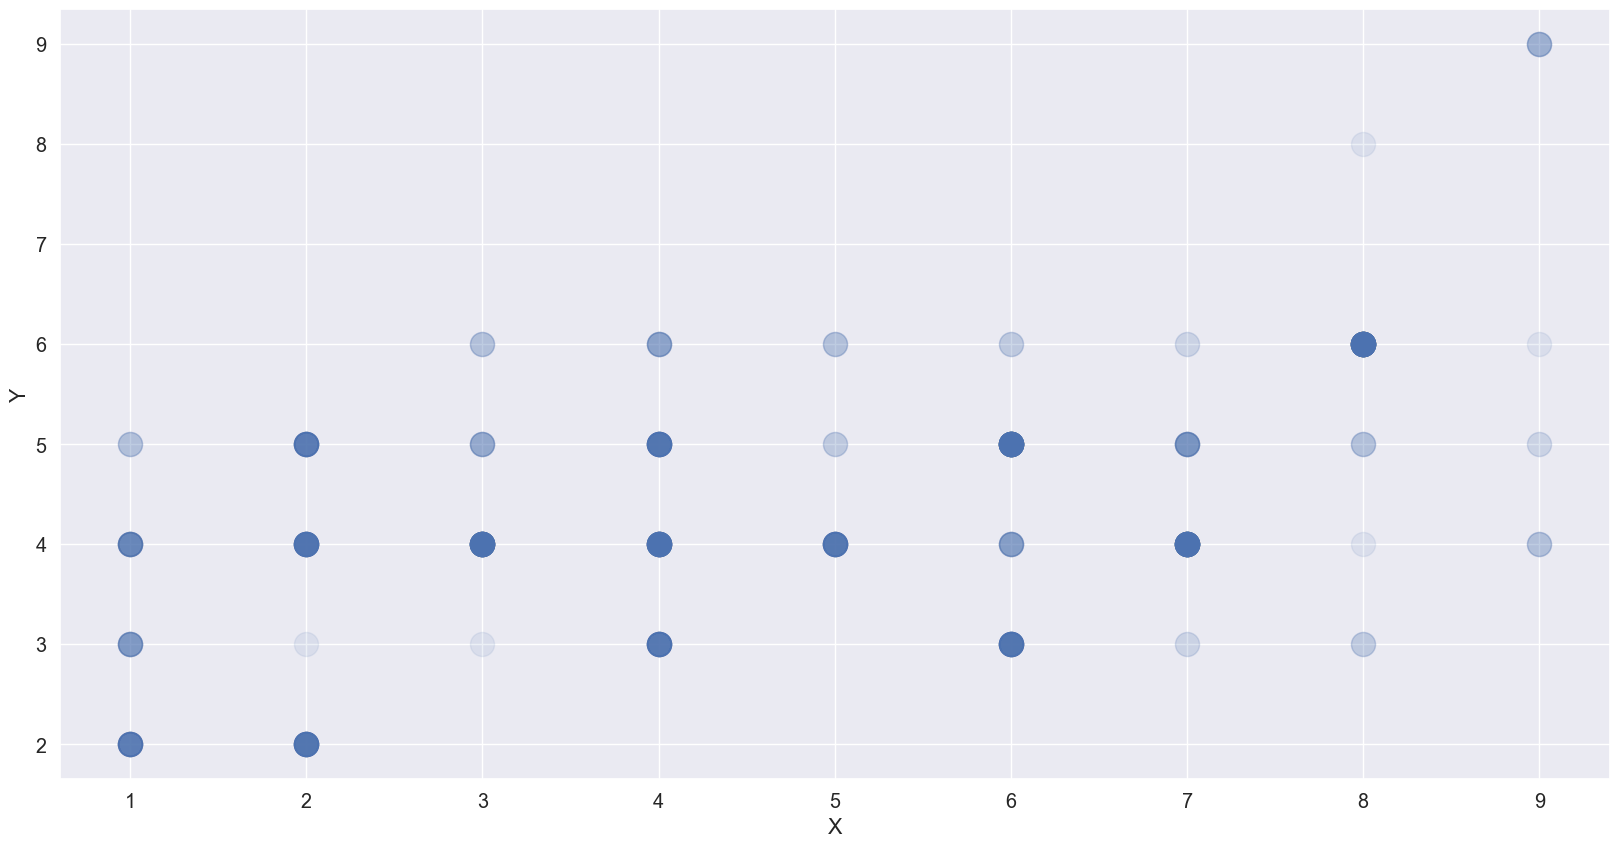

In [57]:
raw_data.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the dataset

Text(0.5, 1.0, 'Burnt area in different regions of the park')

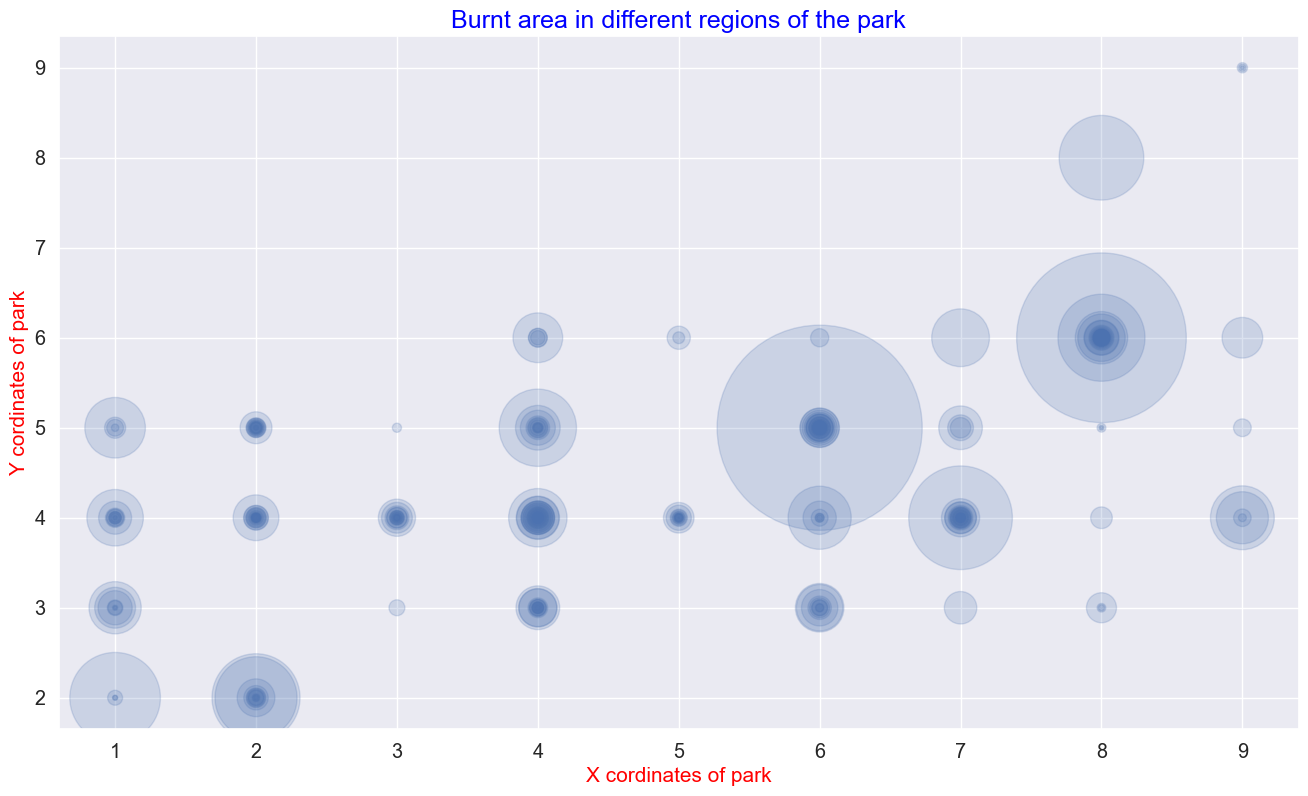

In [58]:
# Analysis of Burnt area based on spatial cordinates(X,Y)
raw_data.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*raw_data['area'],figsize=(16,9))
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

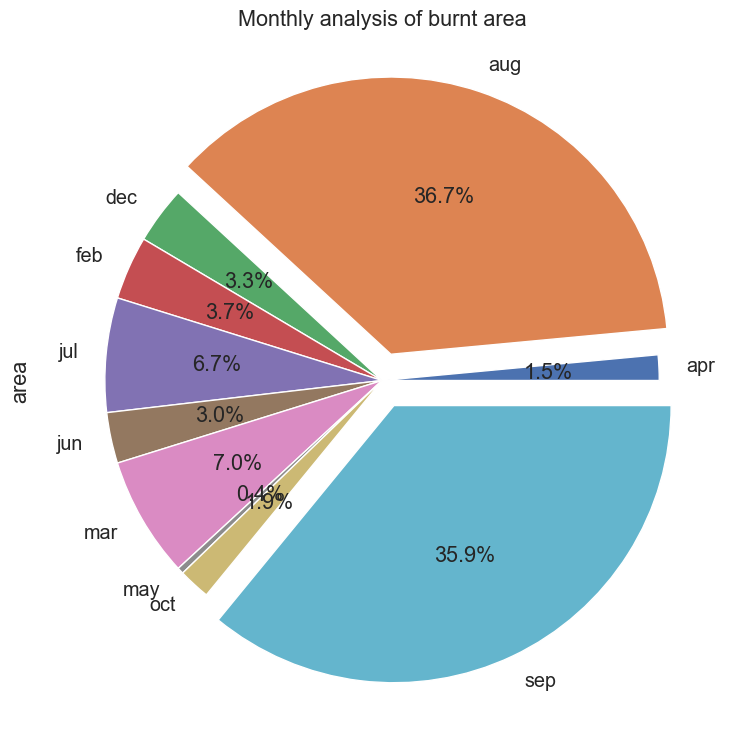

In [59]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

Visualize the Large Forest Fire Size rate by month

In [76]:
df1=raw_data.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

count  % Small Forest Fire  % Large Forest Fire
month                                                     
January        2           100.000000             0.000000
February      20            70.000000            30.000000
March         54            77.777778            22.222222
April          9            77.777778            22.222222
May            2            50.000000            50.000000
June          17            82.352941            17.647059
July          32            71.875000            28.125000
August       184            76.630435            23.369565
September    172            70.348837            29.651163
October       15            73.333333            26.666667
November       1           100.000000             0.000000
December       9            11.111111            88.888889

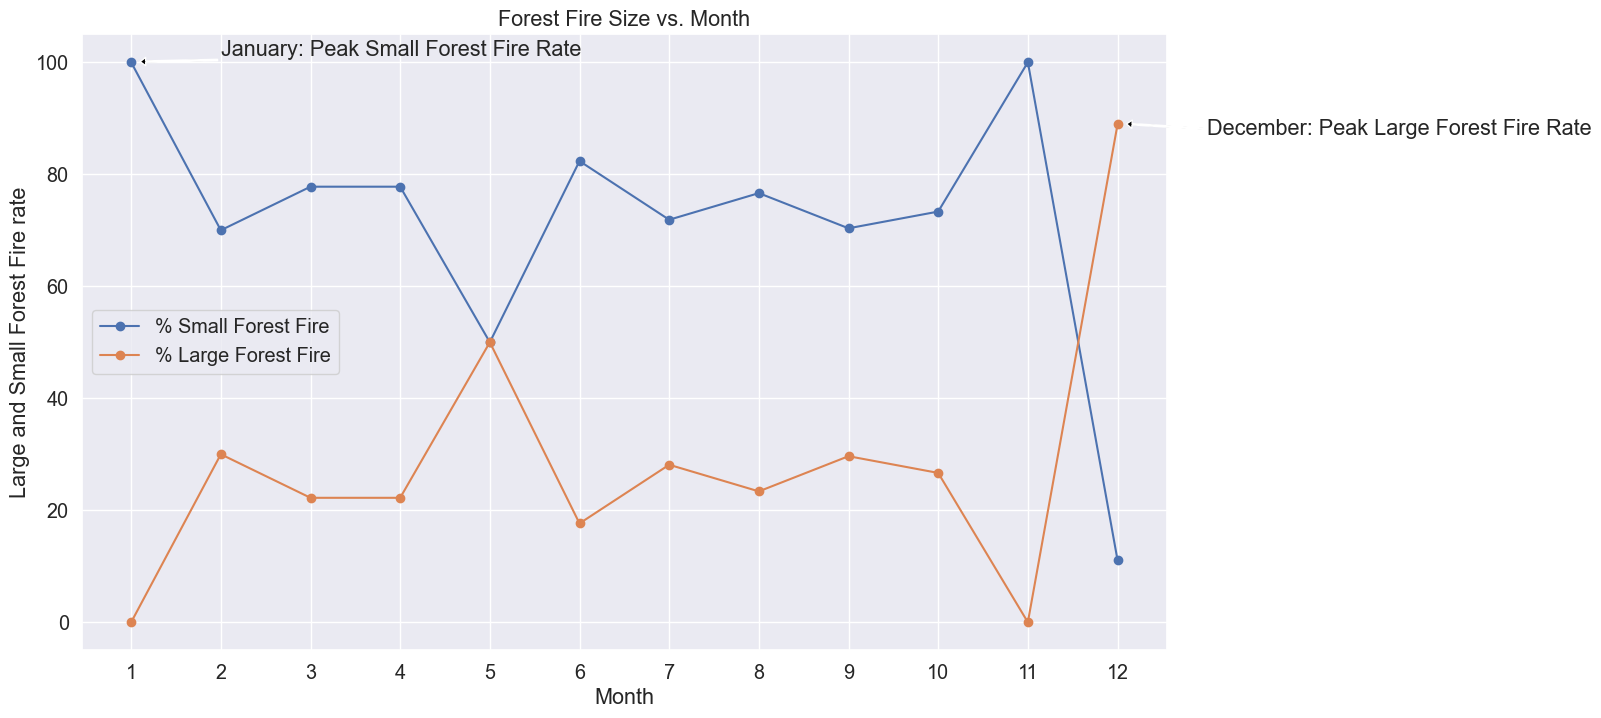

In [78]:
# Step 4: Change 'month' from words to numbers for easier analysis
df1=raw_data.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [79]:
data_ = raw_data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0      False      False     True    False    False    False    False    False   
1       True      False    False    False    False    False    False     True   
2       True      False    False    False     True    False    False    False   
3      False      False     True    False    False    False    False    False   
4      False      False    False    False    False     True    False    False   

   day_wed  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 29 columns]

Text(0.5, 1.0, 'Correlation with Forest Fire Size Category \n')

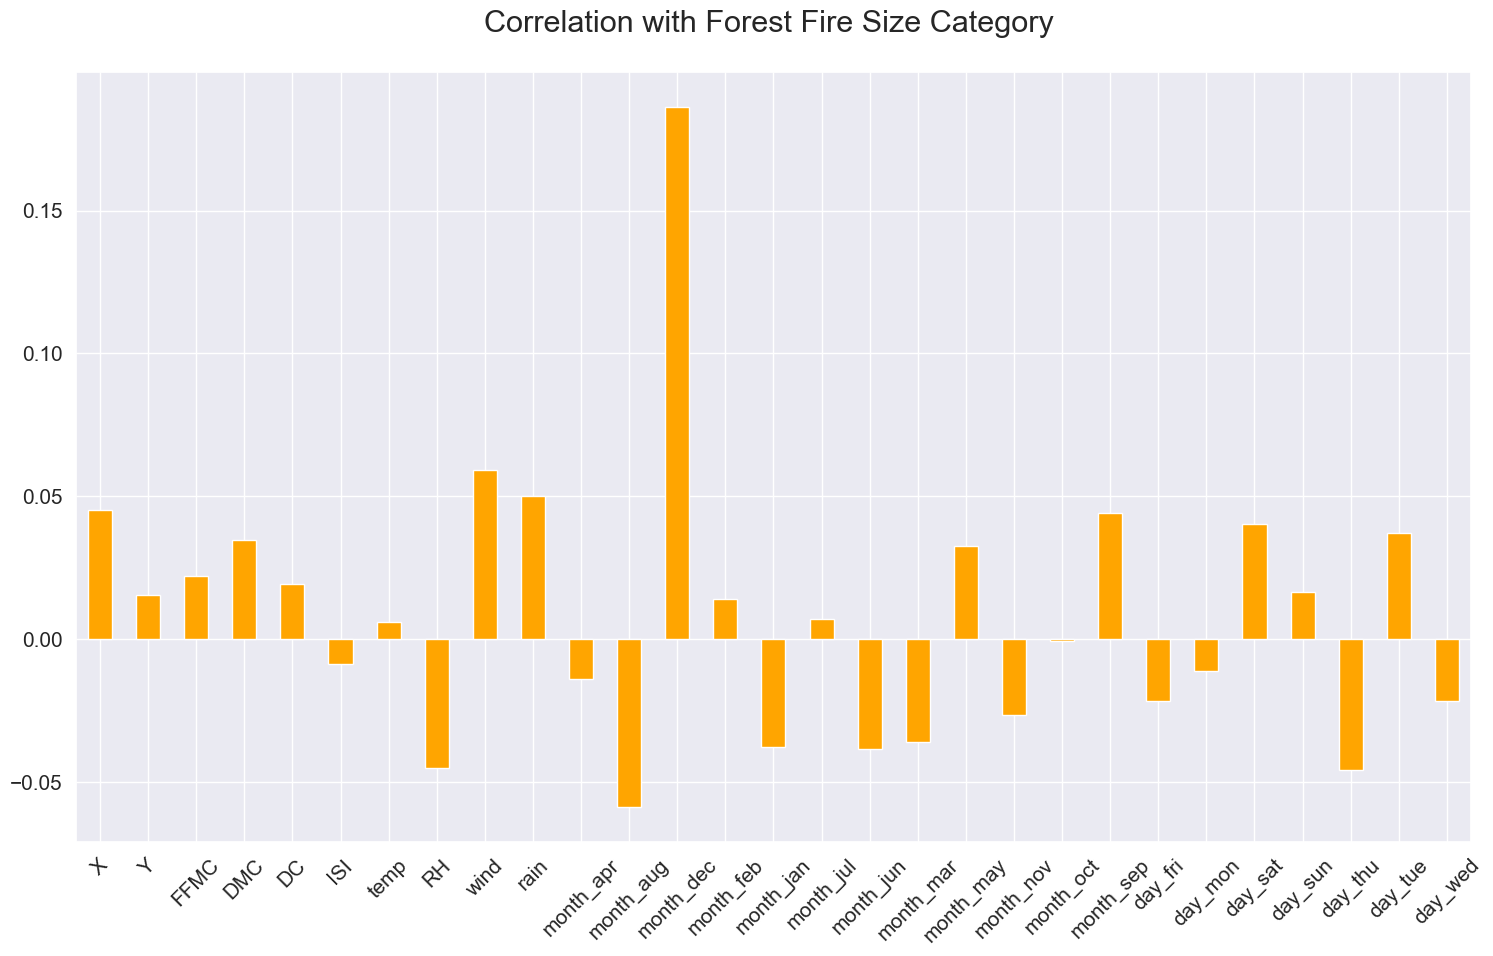

In [80]:
df=raw_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = data_.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Analysis of the response column

In [81]:
raw_data.size_category.unique()

array(['small', 'large'], dtype=object)

Checking for Imbalanced or balanced dataset with regards to the Target

In [82]:
countsizesmall = len(raw_data[raw_data.size_category == 'small'])
countsizelarge = len(raw_data[raw_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(raw_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(raw_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [83]:
raw_data.size_category.value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

Text(0.5, 1.0, 'Foeest Fire Size Category')

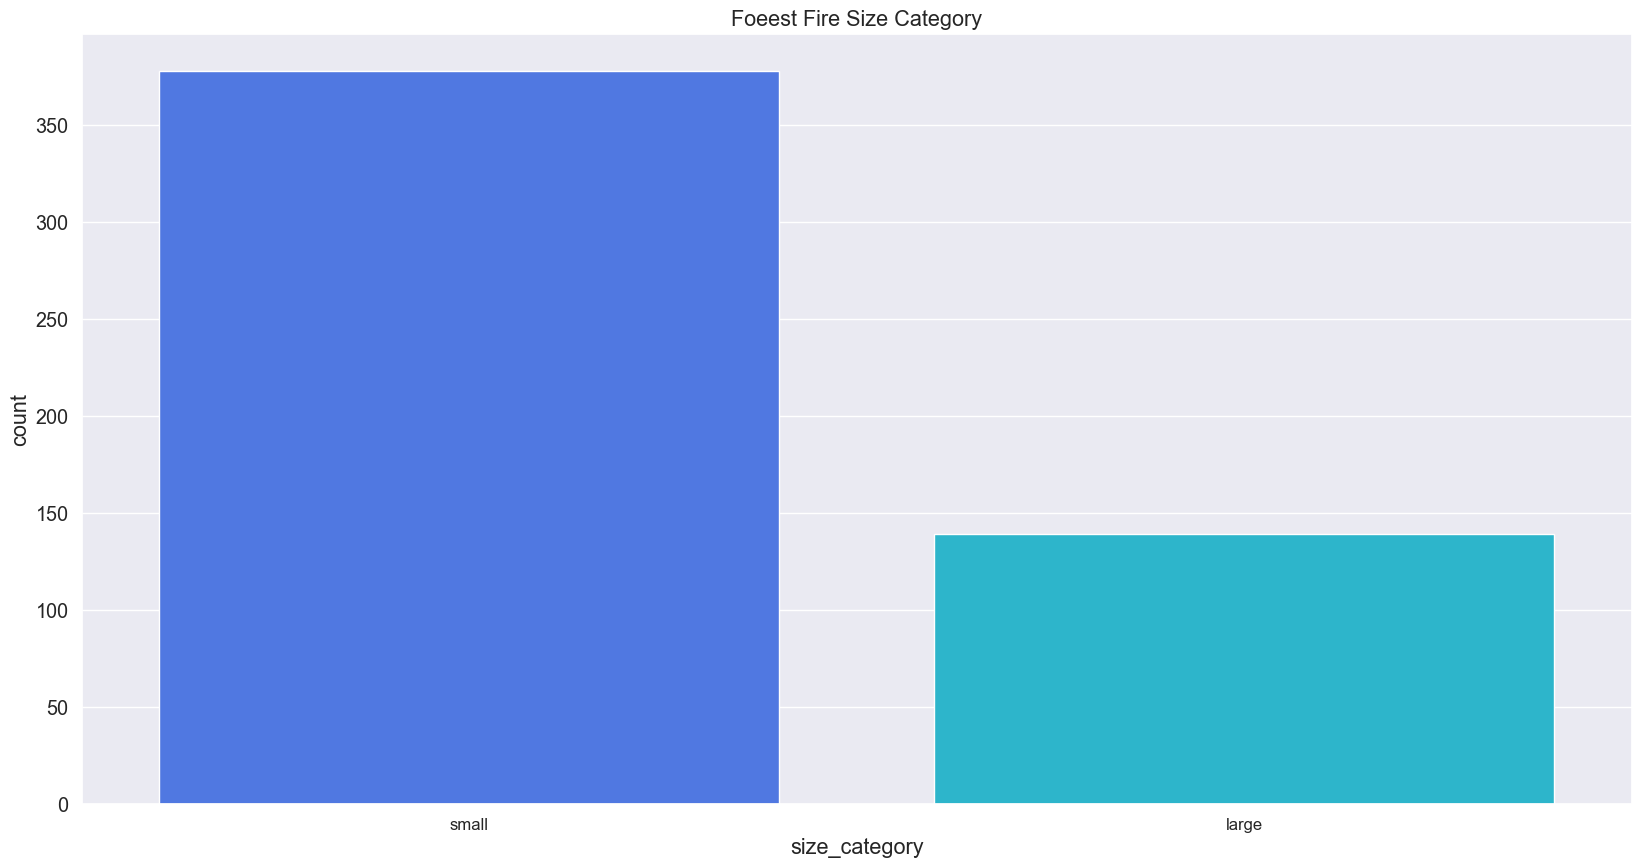

In [84]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=raw_data, palette = pal, 
              order=raw_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

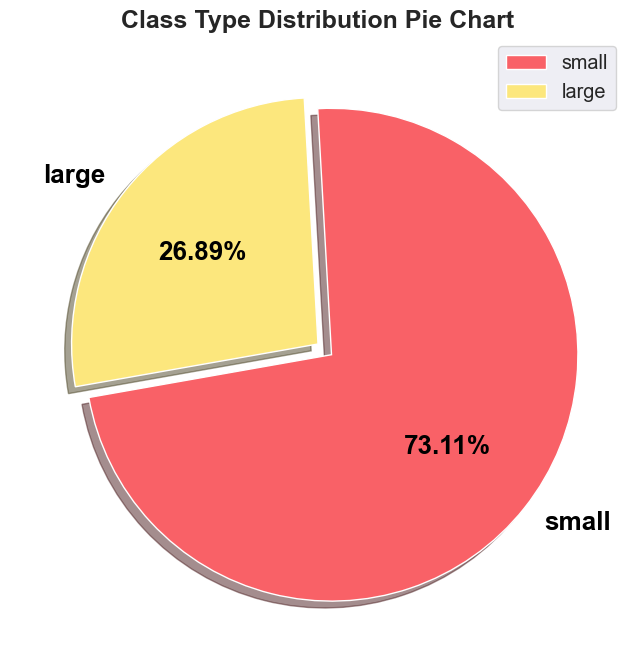

In [86]:
plt.figure(figsize=(12, 8))
plt.pie(raw_data['size_category'].value_counts(),
        labels=raw_data['size_category'].unique(),
        explode=[0.07, 0.0],
        autopct='%.2f%%',
        colors=["#F96167", "#FCE77D"],
        shadow=True,
        startangle=190,
        textprops={'size': 'large',
                   'fontweight': 'bold',
                   'rotation': 0,  # Remove the quotes around 0
                   'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=18, fontweight='bold')
plt.show()

Data Pre-Processing

In [88]:
continuous_feature=[feature for feature in raw_data.columns if raw_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 11


In [89]:
raw_data[continuous_feature]

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 11 columns]

In [90]:
df_standard_scaled = raw_data.copy()
features = df_standard_scaled[continuous_feature]

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

X         Y month  day      FFMC       DMC        DC       ISI  \
0  1.008313  0.569860   mar  fri -0.805959 -1.323326 -1.830477 -0.860946   
1  1.008313 -0.244001   oct  tue -0.008102 -1.179541  0.488891 -0.509688   
2  1.008313 -0.244001   oct  sat -0.008102 -1.049822  0.560715 -0.509688   
3  1.440925  1.383722   mar  fri  0.191362 -1.212361 -1.898266 -0.004756   
4  1.440925  1.383722   mar  sun -0.243833 -0.931043 -1.798600  0.126966   

       temp        RH      wind      rain     area size_category  
0 -1.842640  0.411724  1.498614 -0.073268 -0.20202         small  
1 -0.153278 -0.692456 -1.741756 -0.073268 -0.20202         small  
2 -0.739383 -0.692456 -1.518282 -0.073268 -0.20202         small  
3 -1.825402  3.233519 -0.009834  0.603155 -0.20202         small  
4 -1.291012  3.356206 -1.238940 -0.073268 -0.20202         small

Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [93]:
print(df_standard_scaled.dtypes)

X                float64
Y                float64
month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH               float64
wind             float64
rain             float64
area             float64
size_category     object
dtype: object


In [94]:
numeric_data = df_standard_scaled.select_dtypes(include=['float64', 'int64'])

In [95]:
print("Mean:\n", np.round(numeric_data.mean(), 1))
print("Standard Deviation:\n", np.round(numeric_data.std(), 1))

Mean:
 X       0.0
Y       0.0
FFMC   -0.0
DMC    -0.0
DC      0.0
ISI     0.0
temp    0.0
RH      0.0
wind   -0.0
rain   -0.0
area    0.0
dtype: float64
Standard Deviation:
 X       1.0
Y       1.0
FFMC    1.0
DMC     1.0
DC      1.0
ISI     1.0
temp    1.0
RH      1.0
wind    1.0
rain    1.0
area    1.0
dtype: float64


In [96]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

X         Y      FFMC       DMC        DC       ISI      temp  \
0  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  1.440925  1.383722 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain  ...  month_nov  month_oct  month_sep  \
0  0.411724  1.498614 -0.073268  ...      False      False      False   
1 -0.692456 -1.741756 -0.073268  ...      False       True      False   
2 -0.692456 -1.518282 -0.073268  ...      False       True      False   
3  3.233519 -0.009834  0.603155  ...      False      False      False   
4  3.356206 -1.238940 -0.073268  ...      False      False      False   

   day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  day_wed  
0     True    False    False    False    False    False    False  
1    False    False    False    False    False     True    False  
2    False    False     True    False    False    False    False  
3     True    False    False    False    False    False    False  
4    False    False    False     True    False    False    False  

[5 rows x 30 columns]

Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing

In [97]:
df['size_category'] = raw_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

X         Y      FFMC       DMC        DC       ISI      temp  \
0  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  1.440925  1.383722 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain  ...  month_oct  month_sep  day_fri  day_mon  \
0  0.411724  1.498614 -0.073268  ...      False      False     True    False   
1 -0.692456 -1.741756 -0.073268  ...       True      False    False    False   
2 -0.692456 -1.518282 -0.073268  ...       True      False    False    False   
3  3.233519 -0.009834  0.603155  ...      False      False     True    False   
4  3.356206 -1.238940 -0.073268  ...      False      False    False    False   

   day_sat  day_sun  day_thu  day_tue  day_wed  size_category  
0    False    False    False    False    False              0  
1    False    False    False     True    False              0  
2     True    False    False    False    False              0  
3    False    False    False    False    False              0  
4    False     True    False    False    False              0  

[5 rows x 31 columns]

In [98]:
df.size_category.unique()

array([0, 1])

Feature Selection Technique

In [99]:
forest_fire.drop(['month','day','area'] ,axis=1, inplace= True)

In [100]:
data_ = forest_fire.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  \
0         0         0         0         0         0         0         1   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         1   
4         0         0         0         0         0         0         1   

   monthmay  monthnov  monthoct  
0         0         0         0  
1         0         0         1  
2         0         0         1  
3         0         0         0  
4         0         0         0  

[5 rows x 26 columns]

In [101]:
data_['size_category'] = df1.size_category
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  size_category  
0         0         0          small  
1         0         1          small  
2         0         1          small  
3         0         0          small  
4         0         0          small  

[5 rows x 27 columns]

In [102]:
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  size_category  
0         0         0              1  
1         0         1              1  
2         0         1              1  
3         0         0              1  
4         0         0              1  

[5 rows x 27 columns]

In [103]:
# split into input (X) and output (y) variables
X = data_.drop('size_category', axis = 1)

y=  data_.size_category

In [104]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [105]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [106]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [107]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score   Feature
1   23.006108       DMC
2   21.872657        DC
17  17.601210  monthdec
5    6.350054        RH
7    5.216072      rain
6    1.440661      wind
16   1.157358  monthaug
12   0.964276    daythu
21   0.738170  monthjun
19   0.735450  monthjan
10   0.706636    daysat
13   0.620080    daytue
22   0.597478  monthmar
23   0.543575  monthmay
24   0.367725  monthnov
14   0.217190    daywed
8    0.205497    dayfri
11   0.113897    daysun
15   0.099580  monthapr
18   0.098668  monthfeb
3    0.090542       ISI
0    0.084434      FFMC
9    0.055135    daymon
4    0.033386      temp
20   0.024995  monthjul
25   0.000367  monthoct

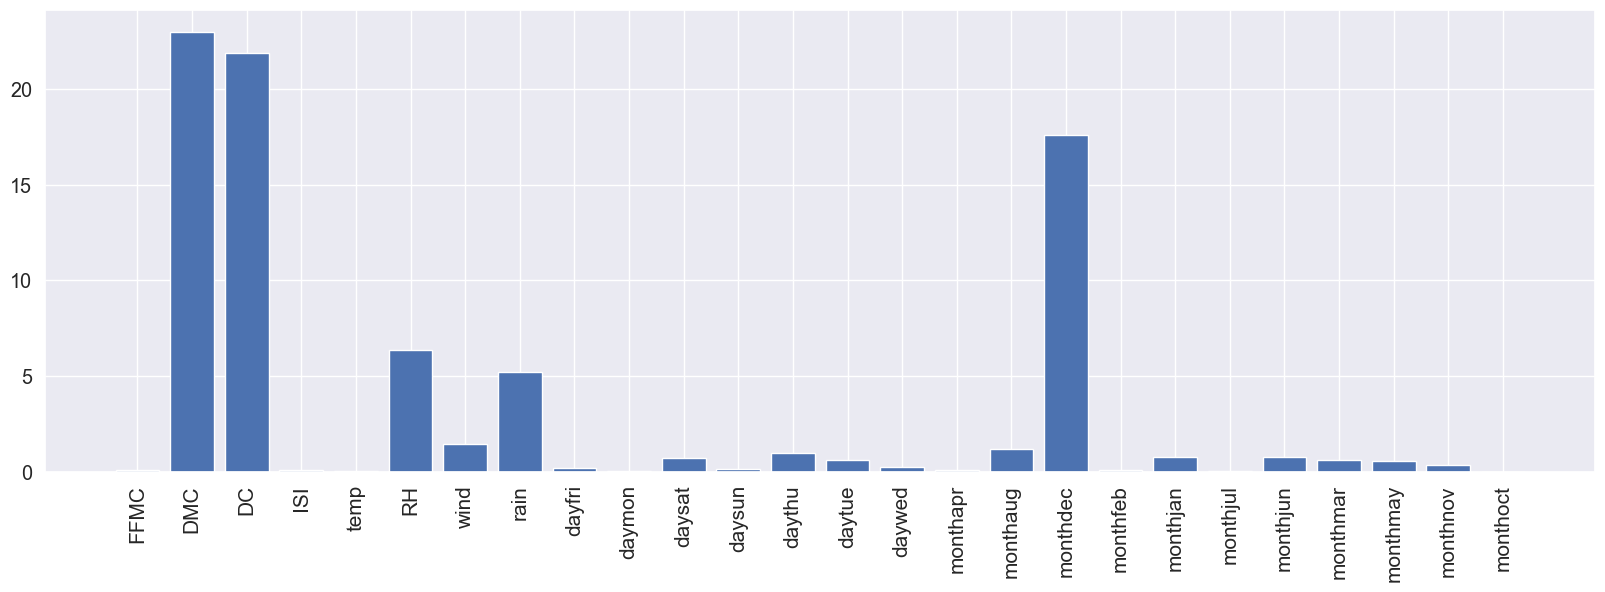

In [108]:
# [0,1,2,3,4,5,6,7,8]
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

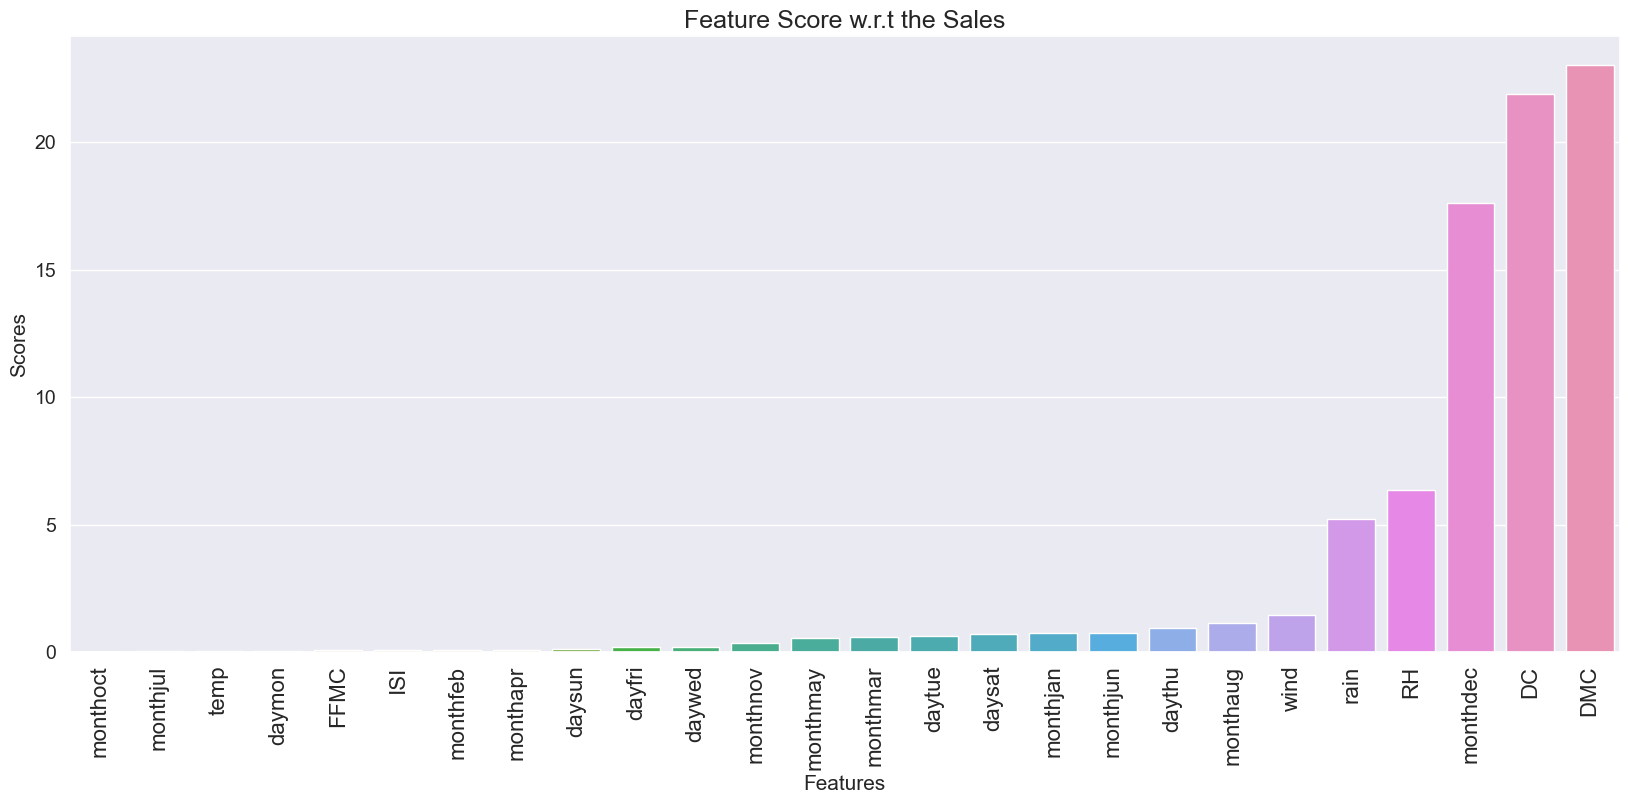

In [109]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [110]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

DMC        DC        RH      rain      wind      area  month_apr  \
0   -1.323326 -1.830477  0.411724 -0.073268  1.498614 -0.202020      False   
1   -1.179541  0.488891 -0.692456 -0.073268 -1.741756 -0.202020      False   
2   -1.049822  0.560715 -0.692456 -0.073268 -1.518282 -0.202020      False   
3   -1.212361 -1.898266  3.233519  0.603155 -0.009834 -0.202020      False   
4   -0.931043 -1.798600  3.356206 -0.073268 -1.238940 -0.202020      False   
..        ...       ...       ...       ...       ...       ...        ...   
512 -0.846648  0.474768 -0.753800 -0.073268 -0.736124 -0.100753      False   
513 -0.846648  0.474768  1.638592 -0.073268  0.995798  0.651674      False   
514 -0.846648  0.474768  1.577248 -0.073268  1.498614 -0.026532      False   
515  0.549003  0.269382 -0.140366 -0.073268 -0.009834 -0.202020      False   
516 -1.685913 -1.780442 -0.815143 -0.073268  0.269509 -0.202020      False   

     month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0        False      False      False      False      False      False   
1        False      False      False      False      False      False   
2        False      False      False      False      False      False   
3        False      False      False      False      False      False   
4        False      False      False      False      False      False   
..         ...        ...        ...        ...        ...        ...   
512       True      False      False      False      False      False   
513       True      False      False      False      False      False   
514       True      False      False      False      False      False   
515       True      False      False      False      False      False   
516      False      False      False      False      False      False   

     month_mar  month_may  month_nov  month_oct  month_sep  size_category  
0         True      False      False      False      False              0  
1        False      False      False       True      False              0  
2        False      False      False       True      False              0  
3         True      False      False      False      False              0  
4         True      False      False      False      False              0  
..         ...        ...        ...        ...        ...            ...  
512      False      False      False      False      False              1  
513      False      False      False      False      False              1  
514      False      False      False      False      False              1  
515      False      False      False      False      False              0  
516      False      False       True      False      False              0  

[517 rows x 19 columns]

Test Train Split With Imbalanced Dataset

In [111]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [112]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

In [113]:
len(x_train.columns)

18

Hyperparameter Tuning

In [114]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [116]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')

In [117]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [119]:
tuner.results_summary(

Results summary
Results in project\Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 18
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 64
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: 0.9807692368825277

Trial 0 summary
Hyperparameters:
num_layers: 3
units_0: 32
units_1: 96
learning_rate: 0.001
units_2: 32
Score: 0.9572649399439493

Trial 2 summary
Hyperparameters:
num_layers: 19
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 64
units_5: 96
units_6: 32
units_7: 32
units_8: 64
units_9: 32
units_10: 96
units_11: 96
units_12: 64
units_13: 64
units_14: 96
units_15: 64
units_16: 64
units_17: 64
units_18: 32
Score: 0.8333333333333334

Trial 3 summary
Hyperparameters:
num_layers: 2
units_0: 64
units_1: 96
learning_rate: 0.01
units_2:

Building Neural Networks Model using Optimal Values

In [140]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    #print(y_test.shape)
    #sys.exit()
    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Assuming x_train, y_train, x_test, y_test are defined elsewhere
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8476454019546509
batch_size: 5 - epochs: 10 Accuracy: 0.9418282508850098
batch_size: 5 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 5 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 10 - epochs: 5 Accuracy: 0.7783933281898499
batch_size: 10 - epochs: 10 Accuracy: 0.8698061108589172
batch_size: 10 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 10 - epochs: 100 Accuracy: 0.9916897416114807
batch_size: 15 - epochs: 5 Accuracy: 0.7645429372787476
batch_size: 15 - epochs: 10 Accuracy: 0.8282548189163208
batch_size: 15 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 15 - epochs: 100 Accuracy: 0.9972299337387085
batch_size: 20 - epochs: 5 Accuracy: 0.7534626126289368
batch_size: 20 - epochs: 10 Accuracy: 0.7922437787055969
batch_size: 20 - epochs: 50 Accuracy: 0.9722991585731506
batch_size: 20 - epochs: 100 Accuracy: 0.9972299337387085


Training Model - using best params

In [145]:
# create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7489 - loss: 0.6890 - val_accuracy: 0.7083 - val_loss: 0.6810
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7437 - loss: 0.6719 - val_accuracy: 0.7167 - val_loss: 0.6563
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7628 - loss: 0.6288 - val_accuracy: 0.7167 - val_loss: 0.6135
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7787 - loss: 0.5724 - val_accuracy: 0.7167 - val_loss: 0.5830
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.5078 - val_accuracy: 0.7250 - val_loss: 0.5680
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7956 - loss: 0.4959 - val_accuracy: 0.7417 - val_loss: 0.5563
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8008 - loss: 0.4877 - val_accuracy: 0.7417 - val_loss: 0.5447
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8081 - loss: 0.4748 - val_accuracy: 0.7667 -

 Model Evaluation Train and Test Error

In [151]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Compare the train-set and test-set accuracy

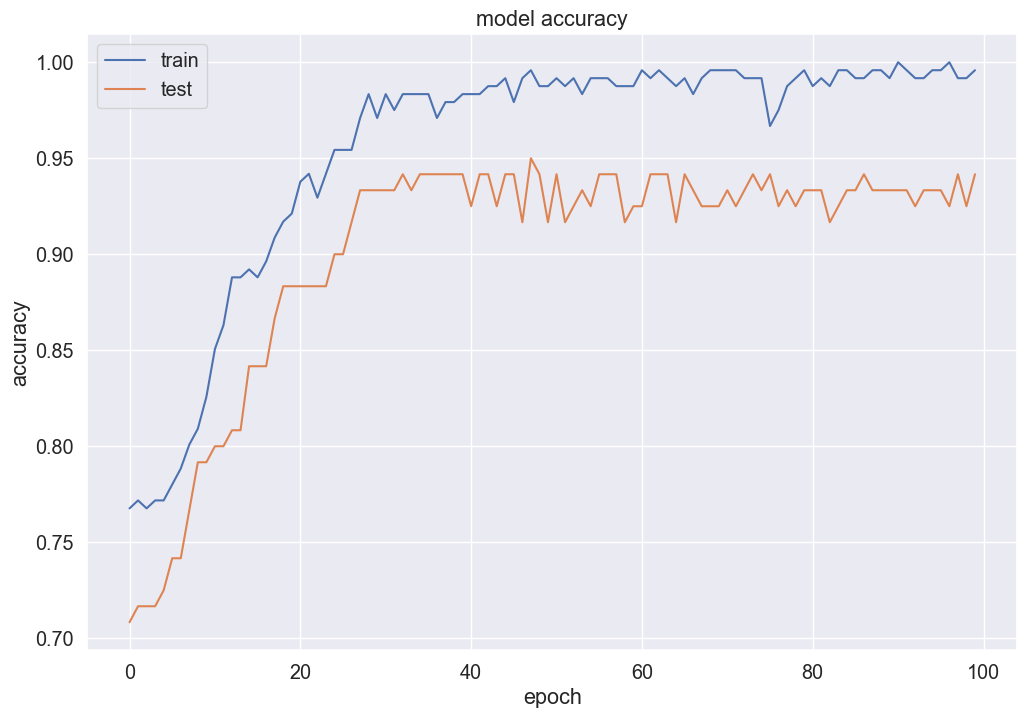

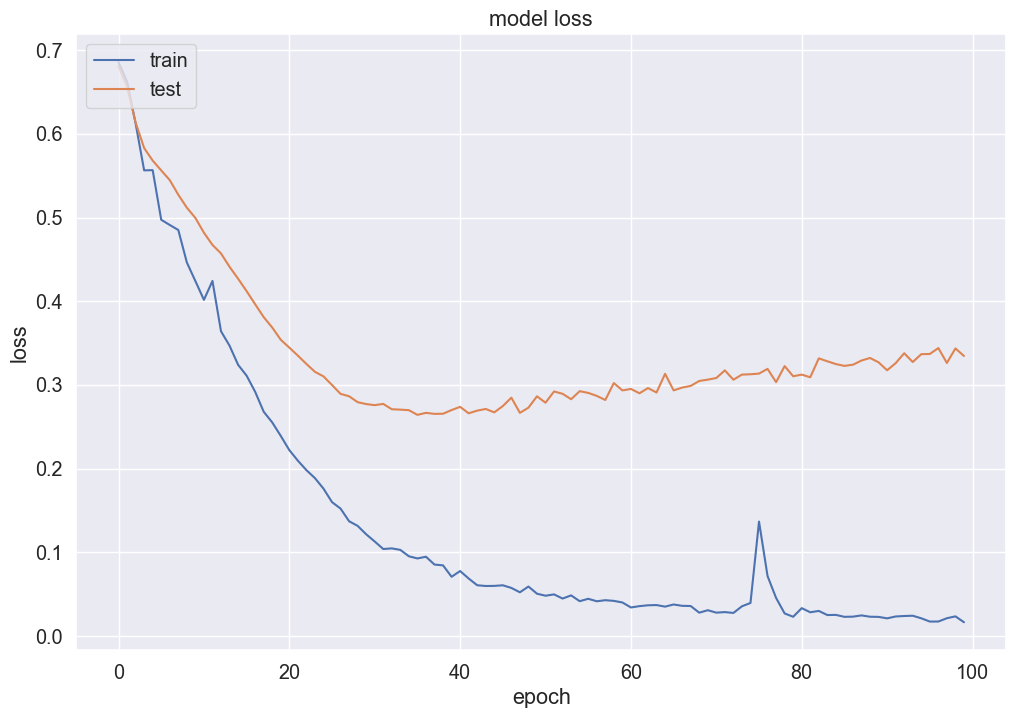

In [152]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predicting values from Model using same dataset

In [153]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(156, 3)


Test_Actual  Test_Probability  Test_Predicted
493            1          0.996796               1
298            0          0.001875               0
93             0          0.002199               0
437            0          0.002513               0
340            0          0.020978               0
7              0          0.002230               0
172            0          0.005244               0
76             0          0.002605               0
148            0          0.002620               0
104            0          0.001927               0

In [154]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(361, 3)


Train_Actual  Train_Probability  Train_Predicted
115             0           0.003244                0
130             0           0.002742                0
413             0           0.002440                0
350             0           0.011582                0
103             0           0.002145                0
511             0           0.002279                0
325             0           0.002228                0
473             1           0.996796                1
265             0           0.002294                0
226             1           0.996796                1

Classification Report

In [155]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  98.0 %
Confusion Matrix for Test Data  =
 [[112   2]
 [  1  41]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.95      0.98      0.96        42

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [156]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  98.0 %
Confusion Matrix for Train Data  =
 [[262   2]
 [  5  92]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       264
           1       0.98      0.95      0.96        97

    accuracy                           0.98       361
   macro avg       0.98      0.97      0.98       361
weighted avg       0.98      0.98      0.98       361



In [157]:
# print the scores on training and test set
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training set score: 98.06%
Test set score: 98.08%


 Confusion matrix

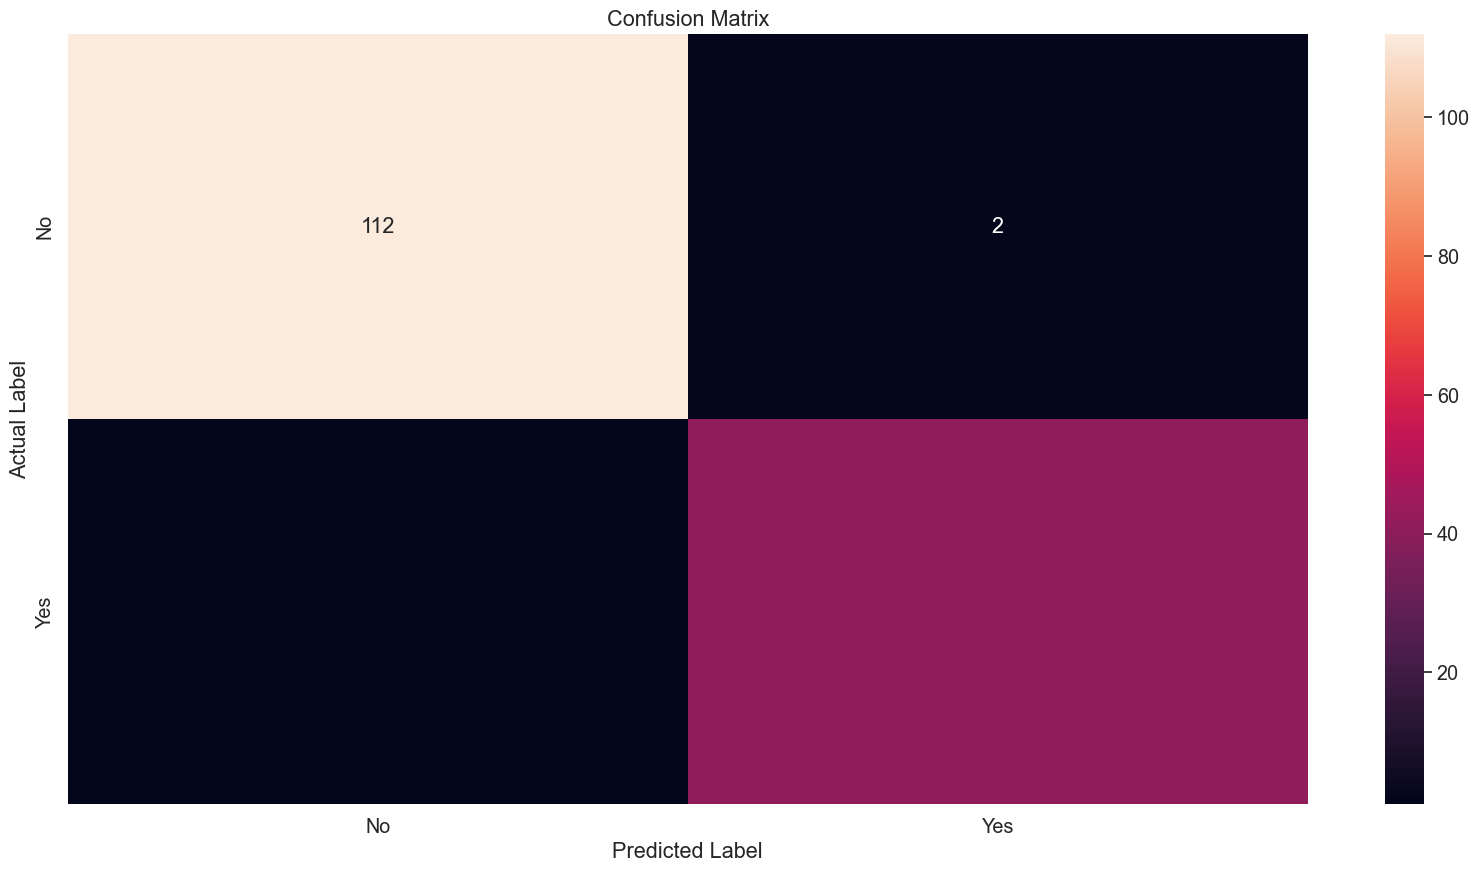

In [158]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

ROC - AUC Curve

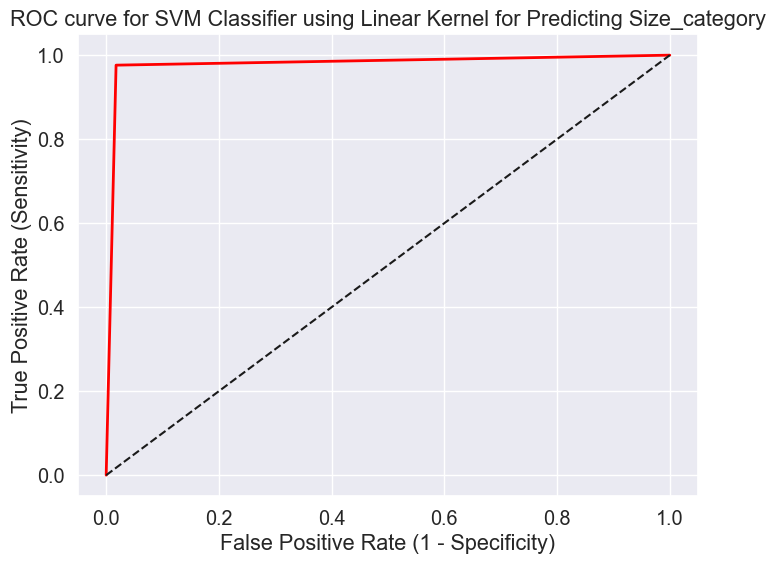

ROC AUC : 0.9793


In [159]:
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

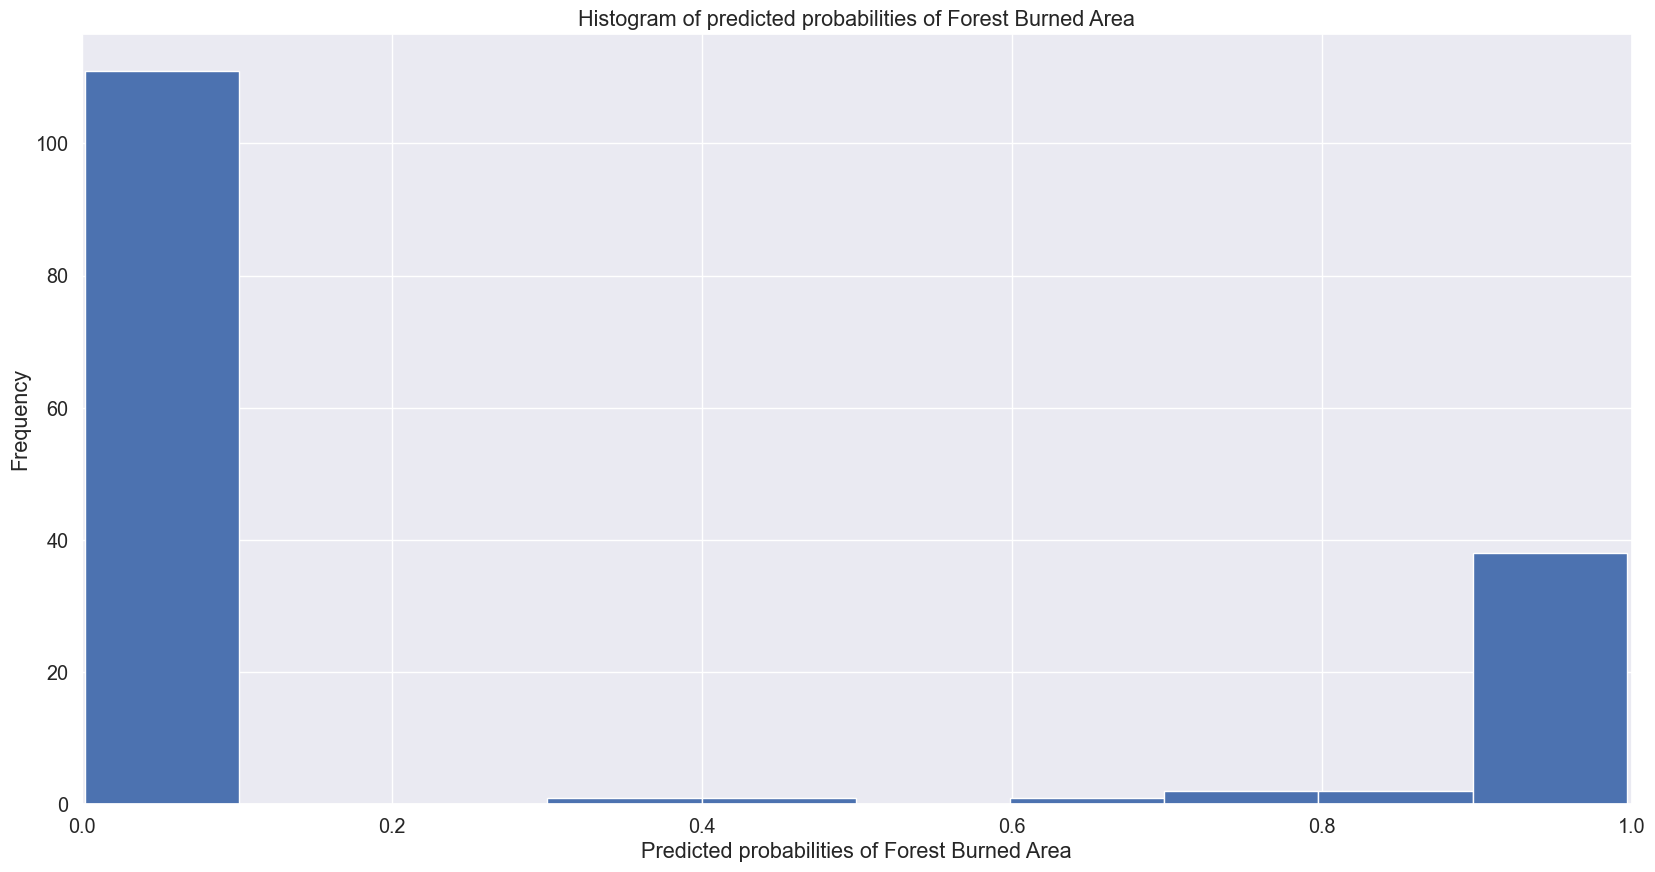

In [160]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(test_prediction['Test_Probability'], bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Forest Burned Area')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Forest Burned Area')
plt.ylabel('Frequency')